# Question 1:  What is Boosting in Machine Learning? Explain how it improves weak learners

Boosting is a machine learning technique that combines many weak models (slightly better than random) to make one strong model by focusing more on the mistakes of previous models.

It improves weak learners by training them in sequence and giving more importance to the examples that earlier models got wrong.

1. AdaBoost (Adaptive Boosting)

Focus: Adjusts weights of training samples based on previous mistakes.

Training process:

Start with all data points having equal weight.

Train a weak learner (usually a decision stump).

Increase the weights of misclassified samples, so the next learner focuses more on them.

Combine weak learners using a weighted vote, where better learners get more weight.

2. Gradient Boosting

Focus: Reduces the overall prediction error by learning the residuals (errors) of previous models.

Training process:

Train a weak learner on the data.

Compute the residuals (difference between actual and predicted values).

Train the next weak learner to predict the residuals.

Add the predictions of all learners together (usually with a learning rate) to get the final prediction.

# Question 3: How does regularization help in XGBoost?

## Regularization in XGBoost

XGBoost uses both L1 and L2 regularization on the leaf weights of trees:

L1 regularization (Lasso, α)

Adds a penalty proportional to the absolute value of leaf weights.

Encourages sparsity → some leaf weights become zero → simpler model.

L2 regularization (Ridge, λ)

Adds a penalty proportional to the square of leaf weights.

Prevents extremely large weights → smoothens predictions → reduces overfitting.

Additionally, XGBoost can limit tree complexity using parameters like:

max_depth → maximum depth of trees

min_child_weight → minimum sum of instance weight in a leaf

gamma → minimum loss reduction to make a split

# Question 4: Why is CatBoost considered efficient for handling categorical data?

CatBoost is efficient for categorical data because:

It can use categories directly (like “red”, “blue”, “small”, “large”) without needing one-hot encoding.

It smartly converts categories to numbers in a way that avoids mistakes from looking at future data.

It is fast and works well even when there are many unique categories.

This makes it accurate and memory-efficient for datasets with lots of categorical

# Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

## Real-World Applications of Boosting

Finance & Credit Scoring

Predicting whether someone will default on a loan.

Boosting can catch subtle patterns in data, which bagging might miss.

Fraud Detection

Detecting credit card or insurance fraud.

Boosting handles imbalanced datasets well and focuses on rare, important cases.

Marketing & Customer Churn Prediction

Predicting which customers are likely to leave a service.

Boosting improves predictive accuracy for complex patterns in customer behavior.

Healthcare & Medical Diagnosis

Detecting diseases from patient data or medical images.

Boosting can capture small but important signals in the data.

Search Ranking & Recommendation Systems

Ranking search results or recommending products.

Boosting models like XGBoost are widely used because they handle large, complex datasets with mixed features.


# Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy


In [2]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)


adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)



AdaBoost Classifier Accuracy: 0.9707602339181286


# Question 7:  Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score



In [3]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)


r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R-squared score:", r2)


Gradient Boosting Regressor R-squared score: 0.7803012822391022


# Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = XGBClassifier(eval_metric='logloss', random_state=42)


param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


print("Best Learning Rate:", grid_search.best_params_['learning_rate'])
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Learning Rate: 0.1
Test Accuracy: 0.9590643274853801


# Question 9: Write a Python program to:
● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn


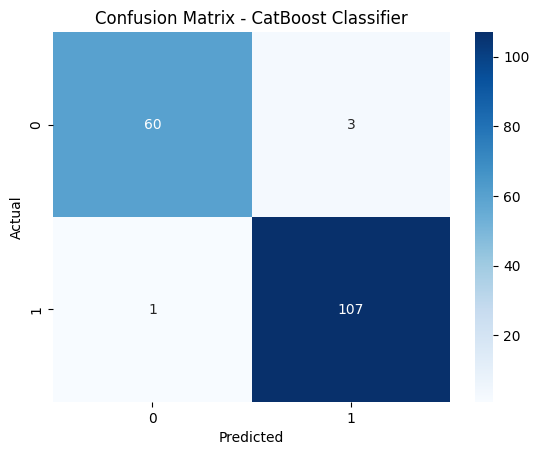

Test Accuracy: 0.9766081871345029


In [22]:

!pip install catboost --quiet


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = CatBoostClassifier(verbose=0, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model


# Task
Summarize the proposed data science pipeline and its key aspects for predicting loan default using boosting techniques, considering data preprocessing (handling missing and categorical values, class imbalance), choice of boosting algorithm (AdaBoost, XGBoost, or CatBoost), hyperparameter tuning, evaluation metrics, and business benefits.

## Data Loading and Initial Exploration

### Subtask:
Load the customer demographics and transaction behavior data. Perform initial data exploration to understand data types, distributions, and identify the extent of missing values and categorical features. Check for the class imbalance in the target variable (loan default).


**Reasoning**:
Since no actual dataset is provided, I will create a synthetic dataset simulating customer demographics and transaction behavior with missing values, categorical features, and a target variable (loan default) to proceed with the data loading and initial exploration subtask. This allows me to demonstrate the requested data exploration steps.




--- First 5 rows of the DataFrame ---
   customer_id  age   income  education marital_status  \
0            0   56  25903.0        PhD        Married   
1            1   69  53051.0  Bachelors       Divorced   
2            2   46  38654.0  Bachelors         Single   
3            3   32  28666.0    Masters        Married   
4            4   60  40301.0    Masters            NaN   

   num_transactions_month  avg_transaction_value  credit_score  \
0                      15             139.143687         745.0   
1                      47              78.443722         485.0   
2                      21             120.402642         369.0   
3                      36             127.539879         449.0   
4                       8             122.238690         545.0   

   has_credit_card  loan_amount  default  
0                1      10974.0        0  
1                1      15265.0        0  
2                0       6364.0        0  
3                0       9491.0        0  


/tmp/ipython-input-2509055290.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df, palette='viridis')


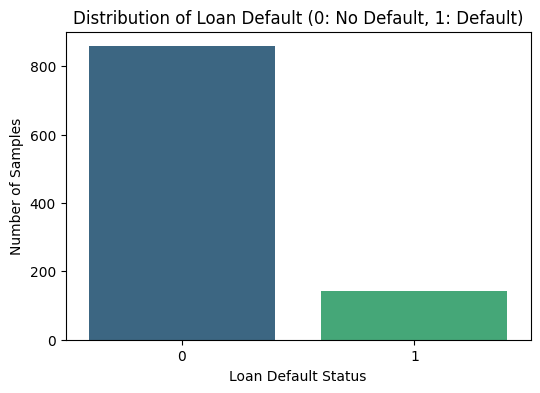

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
num_samples = 1000

data = {
    'customer_id': range(num_samples),
    'age': np.random.randint(18, 70, num_samples),
    'income': np.random.normal(50000, 15000, num_samples).astype(int),
    'education': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], num_samples, p=[0.3, 0.4, 0.2, 0.1]),
    'marital_status': np.random.choice(['Single', 'Married', 'Divorced'], num_samples, p=[0.4, 0.5, 0.1]),
    'num_transactions_month': np.random.randint(5, 50, num_samples),
    'avg_transaction_value': np.random.normal(100, 50, num_samples),
    'credit_score': np.random.randint(300, 850, num_samples),
    'has_credit_card': np.random.choice([0, 1], num_samples, p=[0.3, 0.7]),
    'loan_amount': np.random.normal(10000, 5000, num_samples).astype(int),
    'default': np.random.choice([0, 1], num_samples, p=[0.85, 0.15]) # Imbalanced target variable
}

df = pd.DataFrame(data)

# Introduce some missing values randomly
for col in ['income', 'education', 'marital_status', 'credit_score', 'loan_amount']:
    missing_indices = np.random.choice(df.index, int(num_samples * 0.05), replace=False)
    df.loc[missing_indices, col] = np.nan


print("\n--- First 5 rows of the DataFrame ---")
print(df.head())

print("\n--- DataFrame Info ---")
df.info()


print("\n--- Statistical Summary of Numerical Columns ---")
print(df.describe())


print("\n--- Missing Values ---")
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
print(missing_df.sort_values(by='Missing Percentage', ascending=False))


print("\n--- Categorical Feature Exploration ---")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values and frequencies for '{col}':")
    print(df[col].value_counts(dropna=False)) # Include NaN counts


print("\n--- Target Variable Class Distribution ---")
print(df['default'].value_counts())
print(df['default'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=df, palette='viridis')
plt.title('Distribution of Loan Default (0: No Default, 1: Default)')
plt.xlabel('Loan Default Status')
plt.ylabel('Number of Samples')
plt.show()


**Reasoning**:
The previous step successfully explored the synthetic dataset, revealing missing values in numerical and categorical columns, as well as identified class imbalance. The next logical step in the data science pipeline is to preprocess the data, which includes imputing missing values, encoding categorical features, and addressing the class imbalance as outlined in the problem description.



In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


X = df.drop('default', axis=1)
y = df['default']


X = X.drop('customer_id', axis=1)


numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)


onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
processed_feature_names = numerical_cols + list(onehot_feature_names)

X_processed_df = pd.DataFrame(X_processed, columns=processed_feature_names)

print("--- Shape of preprocessed features (X_processed_df) ---")
print(X_processed_df.shape)
print("\n--- First 5 rows of preprocessed features (X_processed_df) ---")
print(X_processed_df.head())

print("\n--- Class distribution before SMOTE ---")
print(y.value_counts(normalize=True) * 100)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

print("\n--- Class distribution after SMOTE ---")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

print("\nData preprocessing and imbalance handling complete.")


--- Shape of preprocessed features (X_processed_df) ---
(1000, 14)

--- First 5 rows of preprocessed features (X_processed_df) ---
        age    income  num_transactions_month  avg_transaction_value  \
0  0.812959 -1.729470               -0.956403               0.850279   
1  1.680578  0.151930                1.527761              -0.371080   
2  0.145560 -0.845805               -0.490622               0.473186   
3 -0.788799 -1.537989                0.673829               0.616796   
4  1.079919 -0.731665               -1.499814               0.510130   

   credit_score  has_credit_card  loan_amount  education_Bachelors  \
0      1.107075         0.668714     0.243553                  0.0   
1     -0.609806         0.668714     1.102298                  1.0   
2     -1.375799        -1.495408    -0.679032                  1.0   
3     -0.847528        -1.495408    -0.053235                  0.0   
4     -0.213602        -1.495408     1.365065                  0.0   

   education_Hi